this notebook has a lot of messy work where i am playing with data. The main points:
skip to the middle where I compare subscribe vs not subscribe and make graphs. then i make profiles for subscribe and not subsccribe.
then you can skip towards the end where i do data modelling and have conclusions/ recommendations.

In [156]:


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)  # print out all the columns of data frames up to 50 columns.

df = pd.read_csv('full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The data has imported successfully. Let's start a little analysis. Before analysis let's do data cleaning too so we don't have to redo all the analysis each time we open the notebook.

In [2]:
df[df.duplicated(keep=False)] #see if we have duplicate rows (people accidentally recorded twice)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [3]:
df = df.drop_duplicates() #remove duplicate rows. There are 12 duplicate rows (24/2)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df_pdays999_but_prev_or_poutcome = df[(df['pdays'] == 999) & ((df['previous'] != 0) | (df['poutcome'] != 'nonexistent')) ]
df_pdays999_but_prev_or_poutcome
#for all these, previous should be 0 and poutcome should be nonexistent

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


In [6]:
df_pdays999_but_prev = df[(df['pdays'] == 999) & ((df['previous'] != 0) ) ]
df_pdays999_but_prev

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


In [7]:
df_pdays999_but_poutcome = df[(df['pdays'] == 999) & ( (df['poutcome'] != 'nonexistent')) ]
df_pdays999_but_poutcome
#given these 3 tables we made, it is same to conclude that each row with pdays=999 but does not have previous 0 ALSO does not have poutcome non existent and vice versa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


In [8]:
df.loc[(df['pdays'] == 999), 'poutcome' ] = 'nonexistent'
df.loc[(df['pdays'] == 999), 'previous' ] = 0
df_pdays999_but_prev_or_poutcome = df[(df['pdays'] == 999) & ((df['previous'] != 0) | (df['poutcome'] != 'nonexistent')) ]
df_pdays999_but_prev_or_poutcome
# now rows where p days is 999 but poutcome is not nonexistent or previous is not 0 is fixed

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [9]:
df.loc[(df['pdays'] == 999), 'pdays' ] = "no contact"
df[df['pdays']=="no contact"]
# changes all pdays 999 to NaN because when we do analysis on pdays later. 999 will be interpreted as 999 days

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,no contact,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,no contact,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,no contact,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,no contact,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
df.shape

(41176, 21)

Our data had 41,188 rows (people's info collected) and 21 columns(pieces of info recorded for each). Our end goal is to add a 22nd column with boolean or y/n to predict whether they will subscribe for the third campaign based on the current data.

after cleaning our data has 41,176 rows

In [11]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176.000000,41176.000000,41176,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,27,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,no contact,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,NaN,NaN,39661,NaN,39661,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.315815,2.567879,NaN,0.061104,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.305321,2.770318,NaN,0.360337,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,NaN,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,NaN,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,NaN,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


numerical data analyzed. All the counts are 41,188 so we have this data for every participant and none are blank.

Education could possible be converted to a number so we can analyze it here as well.

about 1/4 of the people do admin job

about half people married

about half people have uni degree as main education

about 1/4 of people have default loans

about half have housing loans

about 1/4 has personal loans

little more than half prefer cell contact over tel (cell prob easier to reach I assume)

there are 10 months instead of 12. Also year is not specified so I assume current campaign has been ongoing for 10 months

day_of_week is only weekdays it seems

most poutcomes (90%) non-existent (neither fail or success). not sure how non-existent differs from fail

about 10% subscribed to term deposit which matches what we learned from poutcome.


Age: varies from fom young adult to elderly folks but most people in the middle-aged adult range (30-50)

Duration: contact is generally 0-9min. Anyone with 0 duration automatically did not subscribe to current campaign since they never got a chance to.

Campaign: most people contacted 1-4 times. Everyone's been contacted at least once but since we have 0 durations, some people did not pick up

Pdays: could be converted to another metric because right now it is just telling us that most people were never contacted at previous campaign. Perhaps boolean is better measurement

Previous: again, just confirming that almost everyone was not contacted during previous campaign. But this time numeric is good because 0-7 contacts whereas 999 is not comparable to people who were actually contacted.

Emp.var.rate: not positive what this means but I assume it means employment was going up at time of contact if the value is positive and vice versa. Looks like it hovers between -2 - 1.4 withe the average at about 0.

Cons.price.idx: represents how much a fixed basket of good costs. Good way to measure inflation. Since not too much time has passed, there are no drastic changes.

Cons.conf.idx: how optimisic/ pesstimisitc consumers are feeling about ther current financial situation (for everyone, not for the individual surveyed). not sure which values are high or low but will be good to know for later.

Euribor3m: interest rates being given out by european banks. If interest rates are high, people are less likely to take loans and vice versa. Usually interest rates are low when economy is doing poorly to encourage spending I believe. This also effects interest rates at other banks (competitors).

Nr.employed: always about 5k employees for the campaign bank

In [12]:
df[['poutcome', 'y']] #we can make lots of interesting connections between the information collected but for the purpose of my job, will mostly be comparing how each column affects y so I can point marketing managers to people more likely to subscribe

,poutcome,y
0,nonexistent,no
1,nonexistent,no
2,nonexistent,no
3,nonexistent,no
4,nonexistent,no
...,...,...
41183,nonexistent,yes
41184,nonexistent,no
41185,nonexistent,no
41186,nonexistent,yes


In [13]:
df_success=df[df["poutcome"]=="success"]
df_success[['poutcome', 'y']]

,poutcome,y
24108,success,no
24264,success,no
24279,success,no
24397,success,no
24482,success,no
...,...,...
41163,success,yes
41164,success,yes
41174,success,yes
41178,success,yes


Looks like success and subscription are not perfectly correlated. will need to look more into this and compare other values later. I misunderstood this earlier because I thought previous campaign and current campaign were the same. However there is a previous campaign, current, and we are making profile for those likely to subscribe for future campaign (3 campaigns).

In [14]:
df.loc[:,"emp.var.rate":"y"] #social/ economic attributes VS subsription. nothing much to summarize, just playing

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,-1.1,94.767,-50.8,1.028,4963.6,no
41185,-1.1,94.767,-50.8,1.028,4963.6,no
41186,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
pd.set_option('display.min_rows', 20)

grouped = df.groupby('y')
grouped
grouped.agg([min, max, np.mean, np.std])

age                           duration                                \
    min max       mean        std      min   max        mean         std   
y                                                                          
no   17  95  39.910994   9.897176        0  4918  220.868079  207.116178   
yes  17  98  40.912266  13.838838       37  4199  553.256090  401.190736   

    campaign                         previous                          \
         min max      mean       std      min max      mean       std   
y                                                                       
no         1  56  2.633385  2.873768        0   7  0.023483  0.220467   
yes        1  23  2.051951  1.666353        0   6  0.357405  0.819057   

    emp.var.rate                          cons.price.idx                     \
             min  max      mean       std            min     max       mean   
y                                                                             
no          -3.4  1.4  0.248885  1.482873         92.201  94.767  93.603798   
yes         -3.4  1.4 -1.233089  1.623616         92.201  94.767  93.354577   

              cons.conf.idx                            euribor3m         \
          std           min   max       mean       std       min    max   
y                                                                         
no   0.559006         -50.8 -26.9 -40.593232  4.390759     0.634  5.045   
yes  0.676592         -50.8 -26.9 -39.791119  6.139657     0.634  5.045   

                        nr.employed                                  
         mean       std         min     max         mean        std  
y                                                                    
no   3.811482  1.638179      4963.6  5228.1  5176.165690  64.570288  
yes  2.123362  1.742717      4963.6  5228.1  5095.120069  87.581640

In [16]:
df_subscribed=df[df["y"]=="yes"]
df_subscribed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
182,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,673,2,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,935,3,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,1201,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
389,44,services,married,high.school,no,yes,no,telephone,may,tue,1030,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [19]:
df_unsubbed=df[df["y"]=="no"]
df_unsubbed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df_subscribed.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4639.000000,4639,4639,4639,4639,4639,4639,4639,4639,4639,4639.000000,4639.000000,4639,4639.000000,4639,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639
unique,NaN,12,4,8,2,3,3,2,10,5,NaN,NaN,26,NaN,3,NaN,NaN,NaN,NaN,NaN,1
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,no contact,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,1351,2531,1669,4196,2507,3849,3852,886,1044,NaN,NaN,3672,NaN,3672,NaN,NaN,NaN,NaN,NaN,4639
mean,40.912266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553.256090,2.051951,NaN,0.357405,NaN,-1.233089,93.354577,-39.791119,2.123362,5095.120069,NaN
std,13.838838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.190736,1.666353,NaN,0.819057,NaN,1.623616,0.676592,6.139657,1.742717,87.581640,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,1.000000,NaN,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.500000,1.000000,NaN,0.000000,NaN,-1.800000,92.893000,-46.200000,0.849000,5017.500000,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.000000,2.000000,NaN,0.000000,NaN,-1.800000,93.200000,-40.400000,1.266000,5099.100000,NaN
75%,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.500000,2.000000,NaN,0.000000,NaN,-0.100000,93.918000,-36.100000,4.406000,5191.000000,NaN


In [20]:
df_unsubbed.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,36537.000000,36537,36537,36537,36537,36537,36537,36537,36537,36537,36537.000000,36537.000000,36537,36537.000000,36537,36537.000000,36537.000000,36537.000000,36537.000000,36537.000000,36537
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,23,NaN,3,NaN,NaN,NaN,NaN,NaN,1
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,mon,NaN,NaN,no contact,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,9068,22390,10495,28381,19064,30089,22283,12881,7665,NaN,NaN,35989,NaN,35989,NaN,NaN,NaN,NaN,NaN,36537
mean,39.910994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.868079,2.633385,NaN,0.023483,NaN,0.248885,93.603798,-40.593232,3.811482,5176.165690,NaN
std,9.897176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.116178,2.873768,NaN,0.220467,NaN,1.482873,0.559006,4.390759,1.638179,64.570288,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,1.000000,NaN,0.000000,NaN,-1.800000,93.075000,-42.700000,1.405000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.000000,2.000000,NaN,0.000000,NaN,1.100000,93.918000,-41.800000,4.857000,5195.800000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279.000000,3.000000,NaN,0.000000,NaN,1.400000,93.994000,-36.400000,4.962000,5228.100000,NaN


Above 5 tables gives data for those who are currently subscribed vs those who are not

In [21]:
pd.crosstab(df['age'], df['y']) # compare how many people in each age group are subscribing vs not

y,no,yes
age,,
17,3,2
18,16,12
19,22,20
20,42,23
21,73,29
22,101,36
23,178,48
24,376,86
25,505,93


In [22]:
bds_job = df_subscribed.groupby('job')
bds_job_t = bds_job.size().sort_values(ascending =False)
bds_job_p = (bds_job.size()/len(df_subscribed)).sort_values(ascending =False)

pd.concat([bds_job_t, bds_job_p], axis=1) # looking at how many people (and %) subscribed grouped by jobs

,0,1
job,,
admin.,1351,0.291227
technician,730,0.157362
blue-collar,638,0.137530
retired,434,0.093555
management,328,0.070705
services,323,0.069627
student,275,0.059280
self-employed,149,0.032119
unemployed,144,0.031041


In [23]:
bdu_job = df_unsubbed.groupby('job')
bdu_job_t = bdu_job.size().sort_values(ascending =False)
bdu_job_p = (bdu_job.size()/len(df_unsubbed)).sort_values(ascending =False)

pd.concat([bdu_job_t, bdu_job_p], axis=1)  # looking at how many people (and %) did not subscribe grouped by jobs

,0,1
job,,
admin.,9068,0.248187
blue-collar,8615,0.235788
technician,6009,0.164463
services,3644,0.099735
management,2596,0.071051
entrepreneur,1332,0.036456
retired,1284,0.035142
self-employed,1272,0.034814
housemaid,954,0.026111


above 2 tables compares total number of people and % of people for those subscribing and not subscribing sorted by jobs. we can compare the 2 tables to see which job is more likely to achieve a subscription

# Week 3 conclusion: 

I tried to apply concepts learned in class so far to our current data. Not sure how far I was supposed to go or how much I was supposed to analyze afterwards. I could spend the rest of the week slicing/ breaking down the table in different ways and writing well-thought out analysis but I figured we would find better ways to do that later in the class.


If there is anything important you think I am missing out on OR just general guidance to better organize my project so you can give me better feedback each week. Please let me know! I will fix it up for next week.

# Week 4 Goals

1. Look at the percentage distribution of subscriber (Y or N) and not the absolute numbers across different factors. (not 100% what this means but will try)
2. Profiles on the customers who subscribed
3. Profiles on the customers who didn't subscribe
4. Any significant differences between the profiles  of those who subscribed versus those who didn't

## Hypothesis:

5-7 - Anyone with default, housing, or loan are less likely to subscirve since they will probably want to focus on paying their debts instead of investing

11 - Longer duration of contact will lead to higher likelihood of subscription

12 - more number of contacts lead to higher likelihood of subscription

13 - 999 means no subscription since no contact

15 - if subscribed to previous campaign, it will lead to higher likelihood of subscription

16-20 - when economy is good (employment high, inflation low, confidence high), it will lead to higher likelihood of subscription

21 - yes lead to higher likelihood of subscription than no :P

In [24]:
jobs = pd.concat([bds_job_t, bds_job_p, bdu_job_t, bdu_job_p], axis = 1)
headers = ['total subbed', '% subbed', 'total unsubbed', '%unsubbed']
jobs.columns = headers
jobs

,total subbed,% subbed,total unsubbed,%unsubbed
admin.,1351,0.291227,9068,0.248187
technician,730,0.157362,6009,0.164463
blue-collar,638,0.137530,8615,0.235788
retired,434,0.093555,1284,0.035142
management,328,0.070705,2596,0.071051
services,323,0.069627,3644,0.099735
student,275,0.059280,600,0.016422
self-employed,149,0.032119,1272,0.034814
unemployed,144,0.031041,870,0.023811
entrepreneur,124,0.026730,1332,0.036456


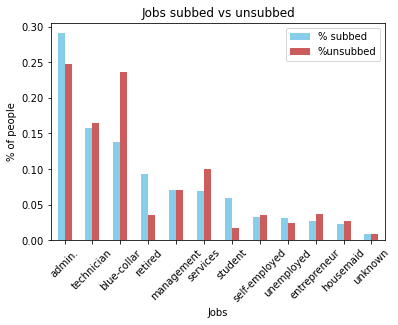

In [25]:
import matplotlib.pyplot as plt

ax = jobs[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Jobs subbed vs unsubbed")
ax.set_xlabel("Jobs")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()
# plt.figure()
# plt.plot(jobs[['% subbed', '%unsubbed']])
# plt.xticks(rotation=45)
# plt.title('Jobs subscribed vs not subscribed')
# plt.ylabel('% of people')
# plt.xlabel('Jobs')
# plt.legend(['% subbed', '% unsubbed'])

# plt.show()
# ax = jobs.plot.bar(rot=0)

above table shows how many people work in each job out of people subscribed and not subscribed. To make profiling easier, I also put it in percentages (since naturally unsubbed value will be higher since there are 37k people vs 5k). I will do this exact same thing for a few categories then we will try to make our profiles

In [26]:
pds_age = df_subscribed.groupby('age')
pds_age_t = pds_age.size().sort_values(ascending =False)
pds_age_p = (pds_age.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_age = df_unsubbed.groupby('age')
pdu_age_t = pdu_age.size().sort_values(ascending =False)
pdu_age_p = (pdu_age.size()/len(df_unsubbed)).sort_values(ascending =False)

age = pd.concat([pds_age_t, pds_age_p, pdu_age_t, pdu_age_p], axis = 1)
age.columns = headers
age = age.fillna(0)
age

age_grouped=age.groupby(pd.cut(age.index, np.arange(17, 107+10, 10))).sum()
age_grouped

,total subbed,% subbed,total unsubbed,%unsubbed
"(17, 27]",583.0,0.125674,2625.0,0.071845
"(27, 37]",1795.0,0.386937,14755.0,0.403837
"(37, 47]",938.0,0.202199,10604.0,0.290226
"(47, 57]",722.0,0.155637,6918.0,0.189342
"(57, 67]",349.0,0.075232,1347.0,0.036867
"(67, 77]",152.0,0.032766,192.0,0.005255
"(77, 87]",82.0,0.017676,75.0,0.002053
"(87, 97]",14.0,0.003018,18.0,0.000493
"(97, 107]",2.0,0.000431,0.0,0.000000


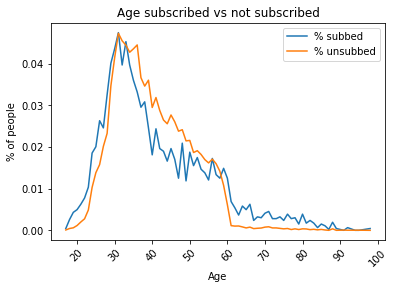

In [27]:
plt.figure()
plt.plot(age[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('Age subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('Age')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

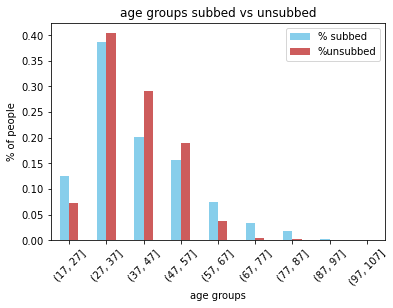

In [28]:
ax = age_grouped[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="age groups subbed vs unsubbed")
ax.set_xlabel("age groups")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [29]:
pds_mar = df_subscribed.groupby('marital')
pds_mar_t = pds_mar.size().sort_values(ascending =False)
pds_mar_p = (pds_mar.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_mar = df_unsubbed.groupby('marital')
pdu_mar_t = pdu_mar.size().sort_values(ascending =False)
pdu_mar_p = (pdu_mar.size()/len(df_unsubbed)).sort_values(ascending =False)

mar = pd.concat([pds_mar_t, pds_mar_p, pdu_mar_t, pdu_mar_p], axis = 1)
mar.columns = headers
mar

,total subbed,% subbed,total unsubbed,%unsubbed
marital,,,,
married,2531,0.545592,22390,0.612803
single,1620,0.349213,9944,0.272162
divorced,476,0.102608,4135,0.113173
unknown,12,0.002587,68,0.001861


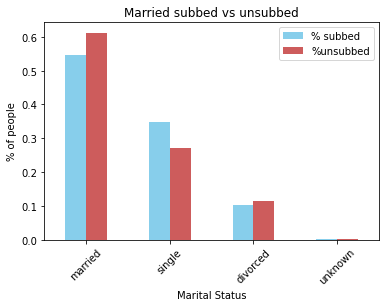

In [30]:
ax = mar[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Married subbed vs unsubbed")
ax.set_xlabel("Marital Status")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [31]:
pds_edu = df_subscribed.groupby('education')
pds_edu_t = pds_edu.size().sort_values(ascending =False)
pds_edu_p = (pds_edu.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_edu = df_unsubbed.groupby('education')
pdu_edu_t = pdu_edu.size().sort_values(ascending =False)
pdu_edu_p = (pdu_edu.size()/len(df_unsubbed)).sort_values(ascending =False)

edu = pd.concat([pds_edu_t, pds_edu_p, pdu_edu_t, pdu_edu_p], axis = 1)
edu.columns = headers
edu

,total subbed,% subbed,total unsubbed,%unsubbed
university.degree,1669,0.359776,10495,0.287243
high.school,1031,0.222246,8481,0.232121
professional.course,595,0.128260,4645,0.127131
basic.9y,473,0.101962,5572,0.152503
basic.4y,428,0.092261,3748,0.102581
unknown,251,0.054106,1479,0.040480
basic.6y,188,0.040526,2103,0.057558
illiterate,4,0.000862,14,0.000383


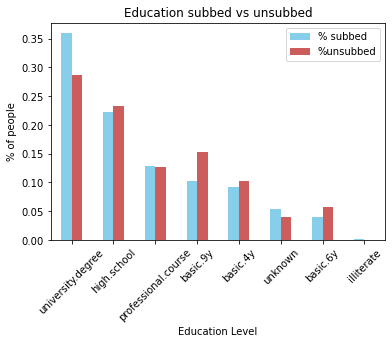

In [32]:
ax = edu[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Education subbed vs unsubbed")
ax.set_xlabel("Education Level")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [33]:
pds_def = df_subscribed.groupby('default')
pds_def_t = pds_def.size().sort_values(ascending =False)
pds_def_p = (pds_def.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_def = df_unsubbed.groupby('default')
pdu_def_t = pdu_def.size().sort_values(ascending =False)
pdu_def_p = (pdu_def.size()/len(df_unsubbed)).sort_values(ascending =False)

defa = pd.concat([pds_def_t, pds_def_p, pdu_def_t, pdu_def_p], axis = 1)
defa.columns = headers
defa = defa.fillna(0)
defa

,total subbed,% subbed,total unsubbed,%unsubbed
no,4196.0,0.904505,28381,0.776774
unknown,443.0,0.095495,8153,0.223144
yes,0.0,0.000000,3,0.000082


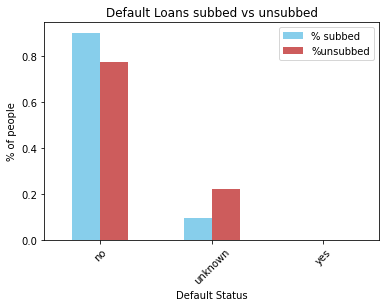

In [34]:
ax = defa[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Default Loans subbed vs unsubbed")
ax.set_xlabel("Default Status")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [35]:
pds_hou = df_subscribed.groupby('housing')
pds_hou_t = pds_hou.size().sort_values(ascending =False)
pds_hou_p = (pds_hou.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_hou = df_unsubbed.groupby('housing')
pdu_hou_t = pdu_hou.size().sort_values(ascending =False)
pdu_hou_p = (pdu_hou.size()/len(df_unsubbed)).sort_values(ascending =False)

hou = pd.concat([pds_hou_t, pds_hou_p, pdu_hou_t, pdu_hou_p], axis = 1)
hou.columns = headers
hou

,total subbed,% subbed,total unsubbed,%unsubbed
housing,,,,
yes,2507,0.540418,19064,0.521772
no,2025,0.436516,16590,0.454060
unknown,107,0.023065,883,0.024167


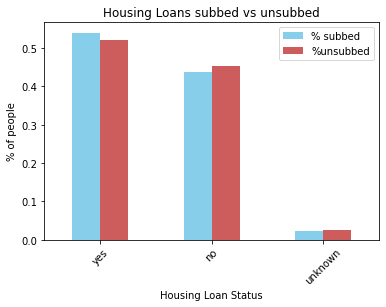

In [36]:
ax = hou[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Housing Loans subbed vs unsubbed")
ax.set_xlabel("Housing Loan Status")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [37]:
pds_loa = df_subscribed.groupby('loan')
pds_loa_t = pds_loa.size().sort_values(ascending =False)
pds_loa_p = (pds_loa.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_loa = df_unsubbed.groupby('loan')
pdu_loa_t = pdu_loa.size().sort_values(ascending =False)
pdu_loa_p = (pdu_loa.size()/len(df_unsubbed)).sort_values(ascending =False)

loa = pd.concat([pds_loa_t, pds_loa_p, pdu_loa_t, pdu_loa_p], axis = 1)
loa.columns = headers
loa

,total subbed,% subbed,total unsubbed,%unsubbed
loan,,,,
no,3849,0.829705,30089,0.823521
yes,683,0.147230,5565,0.152311
unknown,107,0.023065,883,0.024167


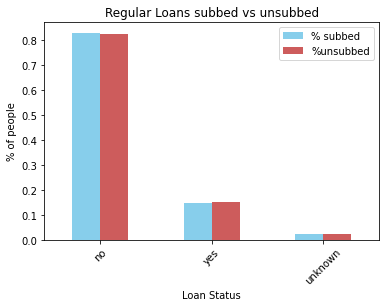

In [38]:
ax = loa[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Regular Loans subbed vs unsubbed")
ax.set_xlabel("Loan Status")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [39]:
pds_contact = df_subscribed.groupby('contact')
pds_contact_t = pds_contact.size().sort_values(ascending =False)
pds_contact_p = (pds_contact.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_contact = df_unsubbed.groupby('contact')
pdu_contact_t = pdu_contact.size().sort_values(ascending =False)
pdu_contact_p = (pdu_contact.size()/len(df_unsubbed)).sort_values(ascending =False)

contact = pd.concat([pds_contact_t, pds_contact_p, pdu_contact_t, pdu_contact_p], axis = 1)
contact.columns = headers
contact

,total subbed,% subbed,total unsubbed,%unsubbed
contact,,,,
cellular,3852,0.830351,22283,0.609875
telephone,787,0.169649,14254,0.390125


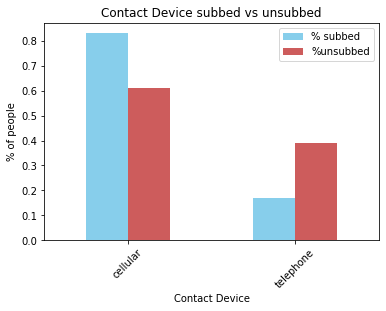

In [40]:
ax = contact[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Contact Device subbed vs unsubbed")
ax.set_xlabel("Contact Device")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [41]:
pds_month = df_subscribed.groupby('month')
pds_month_t = pds_month.size().sort_values(ascending =False)
pds_month_p = (pds_month.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_month = df_unsubbed.groupby('month')
pdu_month_t = pdu_month.size().sort_values(ascending =False)
pdu_month_p = (pdu_month.size()/len(df_unsubbed)).sort_values(ascending =False)

month = pd.concat([pds_month_t, pds_month_p, pdu_month_t, pdu_month_p], axis = 1)
month.columns = headers
month

,total subbed,% subbed,total unsubbed,%unsubbed
may,886,0.190989,12881,0.352547
aug,655,0.141194,5521,0.151107
jul,648,0.139685,6521,0.178477
jun,559,0.120500,4759,0.130252
apr,539,0.116189,2092,0.057257
nov,416,0.089674,3684,0.100829
oct,315,0.067903,402,0.011003
mar,276,0.059496,270,0.007390
sep,256,0.055184,314,0.008594
dec,89,0.019185,93,0.002545


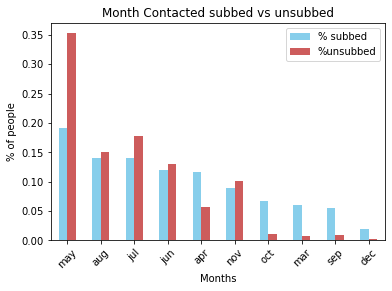

In [42]:
ax = month[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Month Contacted subbed vs unsubbed")
ax.set_xlabel("Months")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show() #ideally x axis is mar-dec and we use line plot. but unsorted bar is better

In [43]:
pds_day_of_week = df_subscribed.groupby('day_of_week')
pds_day_of_week_t = pds_day_of_week.size().sort_values(ascending =False)
pds_day_of_week_p = (pds_day_of_week.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_day_of_week = df_unsubbed.groupby('day_of_week')
pdu_day_of_week_t = pdu_day_of_week.size().sort_values(ascending =False)
pdu_day_of_week_p = (pdu_day_of_week.size()/len(df_unsubbed)).sort_values(ascending =False)

day_of_week = pd.concat([pds_day_of_week_t, pds_day_of_week_p, pdu_day_of_week_t, pdu_day_of_week_p], axis = 1)
day_of_week.columns = headers
day_of_week

,total subbed,% subbed,total unsubbed,%unsubbed
thu,1044,0.225049,7574,0.207297
tue,953,0.205432,7133,0.195227
wed,949,0.204570,7185,0.196650
mon,847,0.182582,7665,0.209787
fri,846,0.182367,6980,0.191039


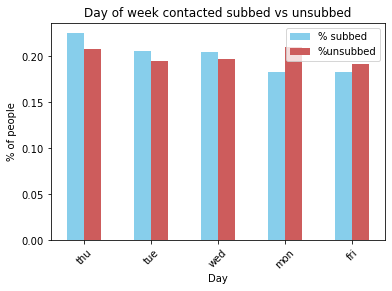

In [44]:
ax = day_of_week[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Day of week contacted subbed vs unsubbed")
ax.set_xlabel("Day")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show() #ideally x axis is mon-fri and we use line plot. but unsorted bar is better

In [45]:
pds_duration = df_subscribed.groupby('duration')
pds_duration_t = pds_duration.size().sort_values(ascending =False)
pds_duration_p = (pds_duration.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_duration = df_unsubbed.groupby('duration')
pdu_duration_t = pdu_duration.size().sort_values(ascending =False)
pdu_duration_p = (pdu_duration.size()/len(df_unsubbed)).sort_values(ascending =False)

duration = pd.concat([pds_duration_t, pds_duration_p, pdu_duration_t, pdu_duration_p], axis = 1)
duration.columns = headers
duration=duration.fillna(0)
duration

duration_grouped=duration.groupby(pd.cut(duration.index, np.arange(0, 5000+500, 500))).sum()
duration_grouped

,total subbed,% subbed,total unsubbed,%unsubbed
"(0, 500]",2541.0,0.547747,33703.0,0.922435
"(500, 1000]",1532.0,0.330244,2440.0,0.066782
"(1000, 1500]",437.0,0.094201,313.0,0.008567
"(1500, 2000]",91.0,0.019616,55.0,0.001505
"(2000, 2500]",25.0,0.005389,11.0,0.000301
"(2500, 3000]",7.0,0.001509,2.0,0.000055
"(3000, 3500]",3.0,0.000647,6.0,0.000164
"(3500, 4000]",2.0,0.000431,2.0,0.000055
"(4000, 4500]",1.0,0.000216,0.0,0.000000
"(4500, 5000]",0.0,0.000000,1.0,0.000027


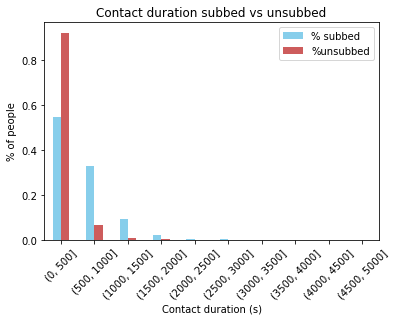

In [46]:
ax = duration_grouped[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Contact duration subbed vs unsubbed")
ax.set_xlabel("Contact duration (s)")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show()

In [47]:
pds_campaign = df_subscribed.groupby('campaign')
pds_campaign_t = pds_campaign.size().sort_values(ascending =False)
pds_campaign_p = (pds_campaign.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_campaign = df_unsubbed.groupby('campaign')
pdu_campaign_t = pdu_campaign.size().sort_values(ascending =False)
pdu_campaign_p = (pdu_campaign.size()/len(df_unsubbed)).sort_values(ascending =False)

campaign = pd.concat([pds_campaign_t, pds_campaign_p, pdu_campaign_t, pdu_campaign_p], axis = 1)
campaign.columns = headers
campaign=campaign.fillna(0)
campaign

,total subbed,% subbed,total unsubbed,%unsubbed
campaign,,,,
1,2299.0,0.495581,15335,0.419712
2,1211.0,0.261048,9357,0.256097
3,574.0,0.123734,4766,0.130443
4,249.0,0.053675,2401,0.065714
5,120.0,0.025868,1479,0.040480
6,75.0,0.016167,904,0.024742
7,38.0,0.008191,591,0.016175
8,17.0,0.003665,383,0.010483
9,17.0,0.003665,266,0.007280


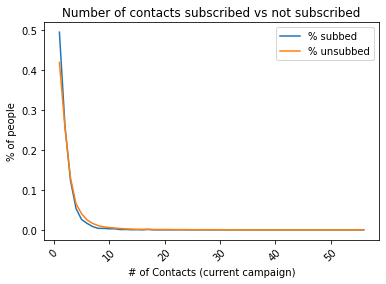

In [48]:
plt.figure()
plt.plot(campaign[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('Number of contacts subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('# of Contacts (current campaign)')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

In [49]:
pds_pdays = df_subscribed.groupby('pdays')
pds_pdays_t = pds_pdays.size().sort_values(ascending =False)
pds_pdays_p = (pds_pdays.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_pdays = df_unsubbed.groupby('pdays')
pdu_pdays_t = pdu_pdays.size().sort_values(ascending =False)
pdu_pdays_p = (pdu_pdays.size()/len(df_unsubbed)).sort_values(ascending =False)

pdays = pd.concat([pds_pdays_t, pds_pdays_p, pdu_pdays_t, pdu_pdays_p], axis = 1)
pdays.columns = headers
pdays=pdays.fillna(0)
# pdays.sort_index(ascending=False)
pdays #ideally this is sorted by index with no contact at start or end but above line did not work

,total subbed,% subbed,total unsubbed,%unsubbed
no contact,3672.0,0.791550,35989.0,0.985002
3,298.0,0.064238,141.0,0.003859
6,289.0,0.062298,123.0,0.003366
4,63.0,0.013581,55.0,0.001505
7,40.0,0.008623,20.0,0.000547
2,37.0,0.007976,24.0,0.000657
9,35.0,0.007545,29.0,0.000794
10,30.0,0.006467,22.0,0.000602
5,29.0,0.006251,17.0,0.000465
13,28.0,0.006036,8.0,0.000219


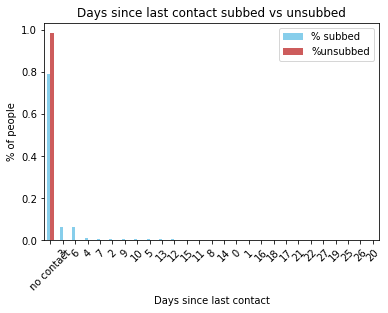

In [50]:
ax = pdays[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Days since last contact subbed vs unsubbed")
ax.set_xlabel("Days since last contact")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show() 
#ideally this graph is sorted 0-27 with no contact at front or back, Could also use line plot, could make bigger

In [51]:
pds_previous = df_subscribed.groupby('previous')
pds_previous_t = pds_previous.size().sort_values(ascending =False)
pds_previous_p = (pds_previous.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_previous = df_unsubbed.groupby('previous')
pdu_previous_t = pdu_previous.size().sort_values(ascending =False)
pdu_previous_p = (pdu_previous.size()/len(df_unsubbed)).sort_values(ascending =False)

previous = pd.concat([pds_previous_t, pds_previous_p, pdu_previous_t, pdu_previous_p], axis = 1)
previous.columns = headers
previous=previous.fillna(0)
previous

,total subbed,% subbed,total unsubbed,%unsubbed
previous,,,,
0,3672.0,0.791550,35989,0.985002
1,516.0,0.111231,349,0.009552
2,281.0,0.060573,124,0.003394
3,119.0,0.025652,47,0.001286
4,35.0,0.007545,23,0.000629
5,13.0,0.002802,3,0.000082
6,3.0,0.000647,1,0.000027
7,0.0,0.000000,1,0.000027


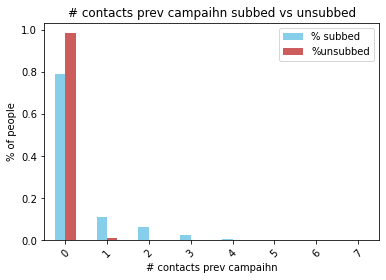

In [52]:
ax = previous[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="# contacts prev campaihn subbed vs unsubbed")
ax.set_xlabel("# contacts prev campaihn")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show() 

In [53]:
pds_poutcome = df_subscribed.groupby('poutcome')
pds_poutcome_t = pds_poutcome.size().sort_values(ascending =False)
pds_poutcome_p = (pds_poutcome.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_poutcome = df_unsubbed.groupby('poutcome')
pdu_poutcome_t = pdu_poutcome.size().sort_values(ascending =False)
pdu_poutcome_p = (pdu_poutcome.size()/len(df_unsubbed)).sort_values(ascending =False)

poutcome = pd.concat([pds_poutcome_t, pds_poutcome_p, pdu_poutcome_t, pdu_poutcome_p], axis = 1)
poutcome.columns = headers
poutcome

,total subbed,% subbed,total unsubbed,%unsubbed
poutcome,,,,
nonexistent,3672,0.791550,35989,0.985002
success,894,0.192714,479,0.013110
failure,73,0.015736,69,0.001888


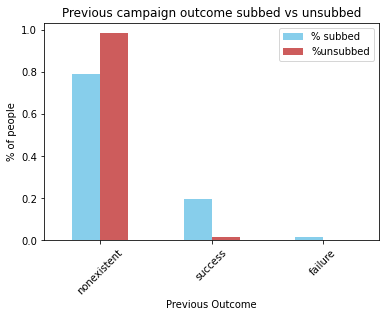

In [54]:
ax = poutcome[['% subbed', '%unsubbed']].plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Previous campaign outcome subbed vs unsubbed")
ax.set_xlabel("Previous Outcome")
ax.set_ylabel("% of people")
plt.xticks(rotation=45)
plt.show() 

In [55]:
pds_emp_var_rate = df_subscribed.groupby('emp.var.rate')
pds_emp_var_rate_t = pds_emp_var_rate.size().sort_values(ascending =False)
pds_emp_var_rate_p = (pds_emp_var_rate.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_emp_var_rate = df_unsubbed.groupby('emp.var.rate')
pdu_emp_var_rate_t = pdu_emp_var_rate.size().sort_values(ascending =False)
pdu_emp_var_rate_p = (pdu_emp_var_rate.size()/len(df_unsubbed)).sort_values(ascending =False)

emp_var_rate = pd.concat([pds_emp_var_rate_t, pds_emp_var_rate_p, pdu_emp_var_rate_t, pdu_emp_var_rate_p], axis = 1)
emp_var_rate.columns = headers
emp_var_rate

,total subbed,% subbed,total unsubbed,%unsubbed
emp.var.rate,,,,
-3.4,454,0.097866,616,0.016860
-3.0,88,0.018970,84,0.002299
-2.9,593,0.127829,1069,0.029258
-1.8,1461,0.314939,7721,0.211320
-1.7,403,0.086872,370,0.010127
-1.1,301,0.064885,334,0.009141
-0.2,1,0.000216,9,0.000246
-0.1,232,0.050011,3450,0.094425
1.1,240,0.051735,7522,0.205873


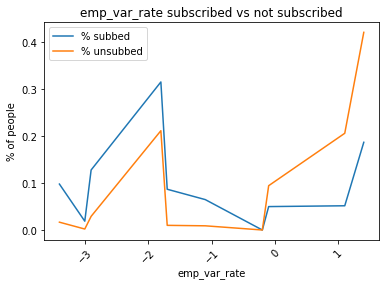

In [56]:
plt.figure()
plt.plot(emp_var_rate[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('emp_var_rate subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('emp_var_rate')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

In [57]:
pds_cons_price_idx = df_subscribed.groupby('cons.price.idx')
pds_cons_price_idx_t = pds_cons_price_idx.size().sort_values(ascending =False)
pds_cons_price_idx_p = (pds_cons_price_idx.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_cons_price_idx = df_unsubbed.groupby('cons.price.idx')
pdu_cons_price_idx_t = pdu_cons_price_idx.size().sort_values(ascending =False)
pdu_cons_price_idx_p = (pdu_cons_price_idx.size()/len(df_unsubbed)).sort_values(ascending =False)

cons_price_idx = pd.concat([pds_cons_price_idx_t, pds_cons_price_idx_p, pdu_cons_price_idx_t, pdu_cons_price_idx_p], axis = 1)
cons_price_idx.columns = headers
cons_price_idx=cons_price_idx.fillna(0)
cons_price_idx 

cons_price_idx_grouped=cons_price_idx.groupby(pd.cut(cons_price_idx.index, np.arange(92, 95+0.5, 0.5))).sum()
cons_price_idx_grouped

,total subbed,% subbed,total unsubbed,%unsubbed
"(92.0, 92.5]",615,0.132572,1045,0.028601
"(92.5, 93.0]",1171,0.252425,6158,0.168541
"(93.0, 93.5]",1053,0.226989,10456,0.286176
"(93.5, 94.0]",908,0.195732,13988,0.382845
"(94.0, 94.5]",741,0.159733,4709,0.128883
"(94.5, 95.0]",151,0.032550,181,0.004954


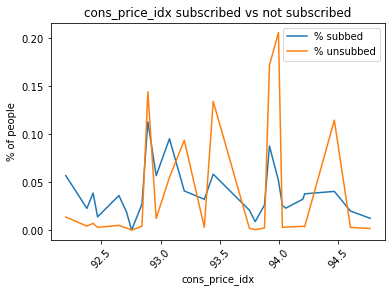

In [58]:
plt.figure()
plt.plot(cons_price_idx[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('cons_price_idx subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('cons_price_idx')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

In [59]:
pds_cons_conf_idx = df_subscribed.groupby('cons.conf.idx')
pds_cons_conf_idx_t = pds_cons_conf_idx.size().sort_values(ascending =False)
pds_cons_conf_idx_p = (pds_cons_conf_idx.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_cons_conf_idx = df_unsubbed.groupby('cons.conf.idx')
pdu_cons_conf_idx_t = pdu_cons_conf_idx.size().sort_values(ascending =False)
pdu_cons_conf_idx_p = (pdu_cons_conf_idx.size()/len(df_unsubbed)).sort_values(ascending =False)

cons_conf_idx = pd.concat([pds_cons_conf_idx_t, pds_cons_conf_idx_p, pdu_cons_conf_idx_t, pdu_cons_conf_idx_p], axis = 1)
cons_conf_idx.columns = headers
cons_conf_idx=cons_conf_idx.fillna(0)
cons_conf_idx

cons_conf_idx_grouped=cons_conf_idx.groupby(pd.cut(cons_conf_idx.index, np.arange(-51, -26+5, 5))).sum()
cons_conf_idx_grouped

,total subbed,% subbed,total unsubbed,%unsubbed
"(-51, -46]",1243,0.267946,7621,0.208583
"(-46, -41]",786,0.169433,13894,0.380272
"(-41, -36]",1492,0.321621,13513,0.369844
"(-36, -31]",664,0.143134,893,0.024441
"(-31, -26]",454,0.097866,616,0.016860


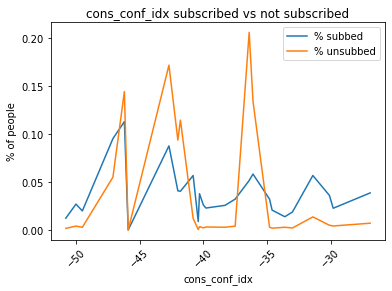

In [60]:
plt.figure()
plt.plot(cons_conf_idx[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('cons_conf_idx subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('cons_conf_idx')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

In [61]:
pds_euribor3m = df_subscribed.groupby('euribor3m')
pds_euribor3m_t = pds_euribor3m.size().sort_values(ascending =False)
pds_euribor3m_p = (pds_euribor3m.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_euribor3m = df_unsubbed.groupby('euribor3m')
pdu_euribor3m_t = pdu_euribor3m.size().sort_values(ascending =False)
pdu_euribor3m_p = (pdu_euribor3m.size()/len(df_unsubbed)).sort_values(ascending =False)

euribor3m = pd.concat([pds_euribor3m_t, pds_euribor3m_p, pdu_euribor3m_t, pdu_euribor3m_p], axis = 1)
euribor3m.columns = headers
euribor3m=euribor3m.fillna(0)
euribor3m

euribor3m_grouped=euribor3m.groupby(pd.cut(euribor3m.index, np.arange(0.6, 5.1+0.5, 0.5))).sum()
euribor3m_grouped

,total subbed,% subbed,total unsubbed,%unsubbed
"(0.6, 1.1]",1947.0,0.419703,2311.0,0.063251
"(1.1, 1.6]",1270.0,0.273766,7788.0,0.213154
"(1.6, 2.1]",83.0,0.017892,95.0,0.002600
"(2.1, 2.6]",0.0,0.000000,0.0,0.000000
"(2.6, 3.1]",1.0,0.000216,0.0,0.000000
"(3.1, 3.6]",0.0,0.000000,6.0,0.000164
"(3.6, 4.1]",87.0,0.018754,1418.0,0.038810
"(4.1, 4.6]",96.0,0.020694,1998.0,0.054684
"(4.6, 5.1]",1155.0,0.248976,22921.0,0.627337


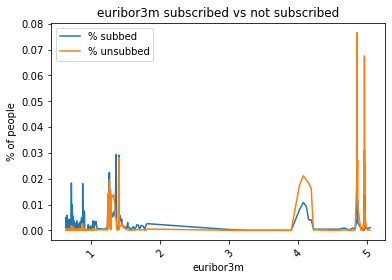

In [62]:
plt.figure()
plt.plot(euribor3m[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('euribor3m subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('euribor3m')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

In [63]:
pds_nr_employed = df_subscribed.groupby('nr.employed')
pds_nr_employed_t = pds_nr_employed.size().sort_values(ascending =False)
pds_nr_employed_p = (pds_nr_employed.size()/len(df_subscribed)).sort_values(ascending =False)
pdu_nr_employed = df_unsubbed.groupby('nr.employed')
pdu_nr_employed_t = pdu_nr_employed.size().sort_values(ascending =False)
pdu_nr_employed_p = (pdu_nr_employed.size()/len(df_unsubbed)).sort_values(ascending =False)

nr_employed = pd.concat([pds_nr_employed_t, pds_nr_employed_p, pdu_nr_employed_t, pdu_nr_employed_p], axis = 1)
nr_employed.columns = headers
nr_employed

,total subbed,% subbed,total unsubbed,%unsubbed
nr.employed,,,,
4963.6,301,0.064885,334,0.009141
4991.6,403,0.086872,370,0.010127
5008.7,369,0.079543,281,0.007691
5017.5,454,0.097866,616,0.016860
5023.5,88,0.018970,84,0.002299
5076.2,593,0.127829,1069,0.029258
5099.1,1092,0.235396,7440,0.203629
5176.3,1,0.000216,9,0.000246
5191.0,240,0.051735,7522,0.205873


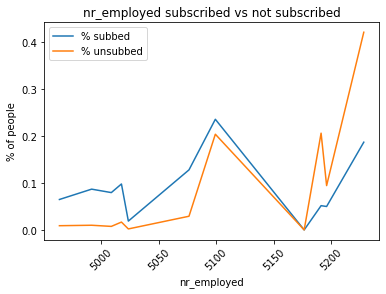

In [64]:
plt.figure()
plt.plot(nr_employed[['% subbed', '%unsubbed']])
plt.xticks(rotation=45)
plt.title('nr_employed subscribed vs not subscribed')
plt.ylabel('% of people')
plt.xlabel('nr_employed')
plt.legend(['% subbed', '% unsubbed'])

plt.show()

# Profiles for those subscribed

-ages 17-26 are more likely to subscribe (13% vs 7%) and ages 57+ are much more likely to subscribe (13% vs 4%)

-students (6% vs 2%), retirees (9% vs 4%), and people with administrative jobs(29% vs 25%) are more likely to subscribe

-singles are more likely to subscribe (35% vs 27%)

-people who go to university are more likely to subscribe (36% vs 29%)

-not enough people have defaults to get good read (only 3 have defaults). But all 3 are unsubbed

-subscribed vs unsubscribed numbers very similar for people with/ without housing or regular loan(s)

-people contacted by cellphone are more likely to subscribe (83% vs 61%)

-people contacted in april (12% vs 6%), oct (7% vs 1%), march (6% vs 1%), sep (6% vs 1%), dec (2% vs 0.3%) are more likely to subscribe (this seems random in my opinion but just noting)

-day of the week contacted seems to have no significant impact on subscribing vs not (everything around 20% for each day)

-people with previous contact over 500 seconds have a much higher chance of subscribing (45% vs 8%). However 0-500 second range includes everyone that is near zero which means we should not look into this too much. No way to control duration for future calls as well.

-people contacted just once are more likely to subscribe then multiple contactes (50% vs 42%)

-pdays seems to only be collecting data for people contacted within the last 27 days from previous campaign so won't read into it too much. However it seems people contacted within the last 27 days are more likely to be subbed than not (21% vs 1%)

-people with 1-6 previous contacts are much more likely to be subscribed than not. 7 is an outlier with just 1 entry unsubscribed (21% vs 1%)

-people who subscribed to previous campaign are much more likely to subscribe as expected (19% vs 1%). Even people who did not subscribe but were part of last marketing campaign were more likely to subscribe (2% vs 0%). Perhaps after hearing about it twice, they wanted to check it out.

## economic factors subbed

-people are more likely to subscribe when the employment variation rate is less than -1 (71% vs 28%)

-people are more likely to subscribe when consumer price index is between 92-93 and 94-95 (58% vs 33%). More of the difference came from the low end (92-93) so perhaps 94-95 was not enough data. OR people subscribe at extreme inflation rates (low or high).

-similar to consumer price index, people subscribe more at extreme consumer confidence index (low or high). for -51 to -46 and -36 to -26 (51% subscribe vs 25% not subscribe)

-people are more likely to subscribe when euribor 3 month rate is low. for euribor3m 0.6-3.1 (71% vs 28%)

-people are more likely to subscribe when number employed is low. nr.employed <5100 (71% 28%)

# Profiles for those unsubscribed

-ages 27-56 are more likely to not subscribe (88% vs 74%) with the biggest discrepancy in the 37-46 range (29% vs 20%)

-blue collar workers are more likely to not subscribe (24% vs 14%)

-married people are more likely to not subscribe (61% vs 55%). perhaps because both people have to agree so you need to convince 2 people to invest instead of just 1

-people with basic.9y educations are more likely to not subscribe (15% vs 10%)

-not enough people have defaults to get good read (only 3 have defaults). But all 3 are unsubbed

-subscribed vs unsubscribed numbers very similar for people with/ without housing or regular loan(s)

-people contacted by telephone are more likely to not subscribe (39% vs 17%). Perhaps people are more likely to pick up/ trust when they are called on their cell

-people contacted in may (35% vs 19%), jul(18% vs 14%), are more likely to not subsribe (this seems random in my opinion but just noting. maybe people don't want to invest in early summer because they are making plans)

-day of the week contacted seems to have no significant impact on subscribing vs not (everything around 20% for each day)

-people with previous contact 500 seconds or under have a much lower chance of subscribing (92% vs 55%). However 0-500 second range includes everyone that is near zero which means we should not look into this too much. No way to control duration for future calls as well.

-people contacted multiple times are more likely to not subscribe (58% vs 50%). Especially after 3 contacts the difference is very apparent that they probably will not subscribe

-pdays seems to only be collecting data for people contacted within the last 27 days so won't read into it too much. However it seems people never contacted/ contacted past 27 days ago are much more likely to not have subscribed (99% vs 79%)

-people with 0 previous contacts are more likely to not have subscribed (99% vs 79%)

-people who were not a part of the previous campaign (first time hearing about this product) are more likely to not subscribe (99% vs 79%)

## economic factors unsubbed

-people are more likely to not subscribe when the employment variation rate is greater than -1 (72% vs 29%)

-people are more likely to not subscribe when the consumer price index is between 93-94 (67% vs 42%). People subscribe less for medium cons price indexes (steady inflation)

-similar to consumer price index, people subscribe less at steady consumer confidence index (medium). for -46 to -36 (75% not subscribe vs 49% subscribe)

-people are more likely to not subscribe when euribor 3 month rate is low. for euribor3m 3.1-5.1 (72% vs 29%)

-people are more likely to not subscribe when number employed is high. nr.employed  > 5100 (72% vs 29%)

# Overall Thoughts

Differences were mentioned while making the profiles fo subscribed vs not subscribed customer so I will try not to repeat myself too much. Key points:

-Middle age group is bad target. Probably need to spend money on kids, family, big things whereas young people don't have big things to spend on and people near retirement are just saving for that.

-Longer duration of contact leads to more subscribing but no real way to control this naturally so no point focusing on this. Once a customer agress to subscribe, no point of extending the call or if they say no and hang up, can't extend it either.

-It seems easier to convince single people since only 1 person responsible for financial decisions

-Cellphone is more effective than telephone (perhaps it is more personal)

-If first call is not successful, probably a better idea to move on to next potential customer than contact that one again

-try to contact people who were contacted for this current campaign, even if they did not subscribe. Chances of subscribing seem to increase when they hear about the product again.

-Make more effort to reach out to people while employment variation rate is low, consumer price index/ consumer confidence index are in the extremes (high or low), euribor 3 month rate is low, number employed is low

# Week 5 Goals

-update tables with lots of rows using pandas cut so I can analyze it easier

-update profiles and overall thoughts for age and duration once this is done

-find data quality issues and clean it if possibleZ

-add visualization (graphs/ plots) above


### Data Cleaning

For my % subbed vs % unsubbed analysis above ^^, I did some data cleaning by replacing all NaN's with 0 using .fillna(0). This is is especially needed for when I made the plots since NaN values don't get plotted.

Below is more data quality analysis. I put my thoughts in comments

In [42]:
df_not999 = df[df['pdays'] != 999]
df_not999.describe()
# when pdays is equal to 999, previous should be 0 and poutcome should be nonexistent. Let's look into that

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,41.852805,321.485809,1.822442,6.014521,1.660726,-2.096238,93.342507,-38.341386,0.985949,5029.244686
std,15.296112,254.676128,1.241414,3.824906,0.934306,0.833032,0.783216,6.628399,0.533622,52.308986
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,165.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-42.000000,0.718000,4991.600000
50%,37.000000,253.000000,1.000000,6.000000,1.000000,-1.800000,93.200000,-38.300000,0.879000,5017.500000
75%,52.000000,392.000000,2.000000,7.000000,2.000000,-1.700000,94.055000,-31.400000,1.044000,5076.200000
max,98.000000,3509.000000,13.000000,27.000000,7.000000,-0.100000,94.767000,-26.900000,4.286000,5195.800000


In [14]:
df_pdays999_but_prev_or_poutcome = df[(df['pdays'] == 999) & ((df['previous'] != 0) | (df['poutcome'] != 'nonexistent')) ]
df_pdays999_but_prev_or_poutcome
#i believe all the 999's here should be changes to 6 (mean of pdays when it is not 999)
#instead change to non existent an

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,39,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,144,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,449,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,114,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,86,1,999,1,failure,-0.1,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,293,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


In [51]:
df_0duration = df[df['duration'] == 0]
df_0duration
#this could be seen as a data problem but I just see it as contact 0.5 seconds or less and rounded down

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


# Week 5 closing thoughts

For some of the plots I belive bar might be better but I could not figure how to do it quickly and it was getting close to Sunday 4pm.

I am pretty happy with the profiles I have created for subscribed vs not subscribed.

For data cleaning, please let me know if I am on the right track with the comments above^^. If yes, I will proceed with changing that.

Please let me know if there is anything important I am missing or should add (for data organization, visualization, cleaning, or profiles)

# Week 6 goals

Delete duplicate rows

Finish data cleaning (when p=999 but previous !=0 and/ or poutcome != nonexistent, change to 0 and nonexistent)

change 999 to usable value (maybe 999 is fine)

Make double bar graphs instead of plots

Do analysis for economic variables factors as well

dive deeper into some of the statistical concepts that we looked into in the last class (correlation? idk)

In [125]:
df.loc[(df['y'] == 'no'), 'y' ] = 0
df.loc[(df['y'] == 'yes'), 'y' ] = 1
df
#need to change values for column y to numeric values instead of yes/ no for ttest

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,no contact,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [126]:
from scipy import stats
stats.ttest_ind(df[df['previous'] == 0]['y'], df[df['previous'] > 0]['y'])

Ttest_indResult(statistic=-69.71083520015468, pvalue=0.0)

Null hypothesis: current campaign subscription is not affected for people with 0 contacts at previous campaign and more than 0. 

Alternative hypothesis:current campaign subscription is affected for people with 0 contacts at previous campaign and more than 0. 

The p value is less than 0.05 (0.0 < 0.05). Therefore, we reject the null hypothesis

# week 6 closing thoughts

was able to clean data (did it at top so data is cleaned before i do all my analysis)

was able to get better charts overall

completed economic profiles for subscribe vs not

Tried some correlation testin above. I believe I did it correctly for previous but please let me know if there is feedback. Also, I do not know how to do correlation testing if there is more than 2 things we are comparing. Ex: for job, there is 10+. What do I do in those scenarios?

# Regression Models

In [67]:
df.loc[(df['y'] == 'no'), 'y' ] = 0
df.loc[(df['y'] == 'yes'), 'y' ] = 1

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [101]:
df.loc[(df['pdays'].isnull()), 'pdays' ] = 999

In [104]:
df_dummies = pd.get_dummies(df[['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']])
df_dummies.head(10)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [105]:
BankData_encoded = pd.concat([df[['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']],df_dummies],axis=1)
BankData_encoded.head(10) #all numerical data concatenated together

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [106]:
BankData_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [144]:
X = BankData_encoded.loc[:,['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]
y = BankData_encoded.loc[:,'y']

In [145]:
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [146]:
y=y.astype('int')

In [147]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27588, 62)
(27588,)
(13589, 62)
(13589,)


In [112]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt

In [150]:
# Logistic Regression all variables
model_lg = linear_model.LogisticRegression(solver='liblinear')
model_lg.fit(X_train,y_train)
model_lg.score(X_train,y_train)

0.8997752646078004

In [151]:
y_actual = y_test 
y_pred =  model_lg.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy = accuracy_score(y_actual, y_pred)

precision = results[0]
recall = results[1]
fscore = results[2]

print(precision)
print(recall)
print(fscore)
print(accuracy)

0.8075150688640849
0.5872972929158633
0.6189951420239749
0.8985944513945102


In [152]:
# Decision Tree

from sklearn import tree

model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X_train,y_train)
model_dt.score(X_train,y_train)

0.9205451645643034

In [153]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_dt.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy2 = accuracy_score(y_actual, y_pred)

precision_dt = results2[0]
recall_dt = results2[1]
fscore_dt = results2[2]

print(precision_dt)
print(recall_dt)
print(fscore_dt)
print(accuracy2)

0.7235581209830565
0.6288016989019363
0.657870923689282
0.8902789020531312


In [154]:
model_dt

DecisionTreeClassifier(max_depth=11)

In [155]:
feat_imp = model_dt.feature_importances_

feat_imp

array([7.59812794e-02, 3.24266671e-02, 2.29776234e-02, 3.91732768e-03,
       2.32011699e-03, 1.15203830e-02, 4.62753811e-02, 8.45791464e-02,
       4.20935149e-01, 5.89484316e-03, 3.80098181e-03, 2.82130314e-03,
       6.22304053e-03, 5.13910552e-03, 4.23815366e-03, 1.90076117e-03,
       3.80691458e-03, 3.99255037e-03, 1.03774089e-02, 1.26241316e-03,
       2.79031631e-03, 3.51074324e-03, 5.72766479e-03, 3.49753415e-03,
       1.25769558e-04, 6.82788494e-03, 2.54790992e-03, 2.76801921e-03,
       9.59606289e-03, 5.16835054e-04, 5.53854486e-03, 1.27093383e-02,
       9.05180068e-03, 1.56814125e-03, 2.55028456e-03, 0.00000000e+00,
       8.39205724e-03, 1.88376980e-03, 3.34216598e-03, 5.93441776e-03,
       1.88213381e-03, 6.50016512e-03, 1.42721005e-02, 3.30814192e-03,
       1.41125020e-03, 1.56858270e-03, 3.64498427e-04, 7.65401481e-04,
       0.00000000e+00, 0.00000000e+00, 1.15690947e-03, 2.18782843e-04,
       1.42298262e-02, 0.00000000e+00, 5.35544933e-03, 1.09112188e-02,
      

In [133]:
#data subset
X = BankData_encoded.loc[:,['age', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]
y = BankData_encoded.loc[:,'y']

In [134]:
X.head()

,age,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,1.1,93.994,4.857,5191.0,0,1,0,0,0,1,0,1,0
1,57,0,1.1,93.994,4.857,5191.0,0,1,0,0,0,1,0,1,0
2,37,0,1.1,93.994,4.857,5191.0,0,1,0,0,0,1,0,1,0
3,40,0,1.1,93.994,4.857,5191.0,0,1,0,0,0,1,0,1,0
4,56,0,1.1,93.994,4.857,5191.0,0,1,0,0,0,1,0,1,0


In [135]:
y=y.astype('int')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [137]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27588, 15)
(27588,)
(13589, 15)
(13589,)


In [138]:
# Logistic Regression all variables
model_lg = linear_model.LogisticRegression(solver='liblinear')
model_lg.fit(X_train,y_train)
model_lg.score(X_train,y_train)

0.8993765405248659

In [139]:
y_actual = y_test 
y_pred =  model_lg.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy = accuracy_score(y_actual, y_pred)

precision = results[0]
recall = results[1]
fscore = results[2]

print(precision)
print(recall)
print(fscore)
print(accuracy)

0.8141749876794253
0.5759704479699204
0.603356160576004
0.8974906174111413


In [140]:
# Decision Tree

from sklearn import tree

model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X_train,y_train)
model_dt.score(X_train,y_train)

0.9161591996520226

In [141]:
# Model valdiation steps
y_actual = y_test 
y_pred =  model_dt.predict(X_test)


from sklearn.metrics import precision_recall_fscore_support

results2 = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy2 = accuracy_score(y_actual, y_pred)

precision_dt = results2[0]
recall_dt = results2[1]
fscore_dt = results2[2]

print(precision_dt)
print(recall_dt)
print(fscore_dt)
print(accuracy2)

0.734518394699346
0.6250185329583905
0.6562466820080909
0.8925601589520936


In [142]:
model_dt

DecisionTreeClassifier(max_depth=11)

In [143]:
feat_imp = model_dt.feature_importances_

feat_imp

array([0.16538859, 0.01451687, 0.03463367, 0.05672748, 0.14471063,
       0.45195124, 0.0061339 , 0.00889022, 0.00711523, 0.00274696,
       0.01316815, 0.00427535, 0.00184508, 0.00089602, 0.08700062])

# Conclusion

https://docs.google.com/spreadsheets/d/1ME4fG6ITV518lau9mw2rBkE6VMk2RYfT_nrmTQ4W5-Q/edit?usp=sharing

When I run the log regression and decision tree tests for variables that I believed were important in determining whether an individual will subscribe or not subscribe. I get high results for accuracy, precision, recall, and f-score. This means that the profiles for those who subscribed vs those who did not subscribe are accurate and can be relied on for future marketing campaigns. 

Using all variables gets me a slighly higher accuracy and f-score. However, just because these extra factors do not negatively affect the scores, it does not increase the scores by much either. I could do a lot more testing using more models, VIF, and correlation matrixes but due to time constraints, this is what we are have. When I included duration (a variable which will lead to data leakage and higher scores), the scores did increase significantally so this leads me to believe that the other variables do not have as much correlation since they don't increase the score a lot.

The variables I chose for the subset for my models were determined by seeing which factors seemed to play a big difference in subscribed vs not subscribed during my data exploration. For example, day of the week had very little impact and percentages for subscribed and not were distributed evenly through each weekday. Thus I excluded it. The percentages for people who subscribed vs not for who were part of the previous campaign was massive whether they subscribed or not (19% vs 1% for success, 2% vs 0% for failure). Thus I included this in my subset.

However the eye test seemed to work overall since I got good scores as mentioned earlier. The best model out of the 4 created would be decision tree with subset of variables (['age', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']).
Even though all variables got me slightly better scores, I chose not to use those since it would be too much to focus on and they improvement is very minimal. From the 2 subsets, decision tree performed better in accuracy and recall. Precision was better for log regression. However, The f-score was higher for decision tree and f-score gives an overall weighted score which between accuracy and recall which is typically more useful. Especially in our case, since cost of false positive and false negative is NOT similar cost. False positives don't cost too much since it is just 1 phone call. False negatives is a big cost because you are not calling someone who would have subscribed. Given that percentage of people who subscribe is already so low, you cannot miss calling people who are potential customers. Thus recall is very important.

## Recommendations

1. Reach out to people who were a part of the previous campaign (success or not).
2. Try to reach out to age groups 20-30 and 50+. Middle age groups less likely to subscribe
3. After one contact, don't spend too much repeatedly contacting same person.
4. Single people tend to subscribe more. So for married people, maybe try to get both partied involved in the contact.
5. Try to reach out on cellphone over telephone.
6. Economic variables good for more subscriptions: lower emp var rate, consumer price/ conf index are in extremes (high/ low), euribor 3 month rate is low, number employed is low.

These were the conclusions I came up with after data exploration and were confirmed via modelling.
